# Section 31: Support Vector Machines

- online-ds-ft-070620
- 09/29/20

##   Questions?

- Walkthrough of an sklearn SVC
- 

## Learning Objectives

- To revisit Linear (Algebra) Equations and revisit the relationship between $y=mx+b$ and $y= w^TX+B$.
- To understand how support vector machine attempts to separate groups.
- Discuss the advantages / disadvantages of SVMs

- To understand the math notation of SVMs
- Learn about using kernels with SVMs


- Apply SVC with a real-world dataset
    - Use pipelines for preprocessing


## Resources

- BLOG POSTS/ARTICLES
    - [Towards Data Science - SVM Simply Explained](https://towardsdatascience.com/support-vector-machine-simply-explained-fee28eba5496)
- STUDY GROUP RECORDINGS:
    - [Support Vector Machines - Victor](https://www.youtube.com/watch?v=_QmnoubpU3Q&list=PLVoXE6pv5LIg4WOllQ4rNPi9BtvtVMb78&index=5)
    - [The Kernel Trick - Victor](https://www.youtube.com/watch?v=mnN74NI4Gqk&list=PLVoXE6pv5LIg4WOllQ4rNPi9BtvtVMb78&index=6)

# Support Vector Machines



<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/i_support_vector_machines.jpg" width=50%>

> Available now for [purchase](https://www.amazon.com/Support-Machines-Network-Machine-Learning/dp/B07XTLT7RL/ref=sr_1_2?dchild=1&keywords=i+support+vector+machines&qid=1579708346&s=apparel&sr=1-2) 😉


- **Supervised learning**
- Classification OR regression.
- We can sacrifice accuracy to get _better_ boundaries (and protect against outliers)
<img src="https://raw.githubusercontent.com/learn-co-students/dsc-introduction-to-support-vector-machines-online-ds-pt-100719/master/images/new_SVM_C.png" width=80%>


#### Advantages
- Good for datasets with more variables than observations
- Robust against outliers

- Good performance
- Good off-the-shelf model in general for several scenarios
- Can approximate complex non-linear functions

#### Disadvantages
- Long training time required
- Tuning required to determine optimal kernel for non-linear SVMs

#### Requirements
- Scaled features
- Null values filled






# Motivation

In [1]:
from fsds.imports import *
import sklearn.datasets as datasets

# Loading in an example dataset
plt.style.use('seaborn-notebook')
iris = datasets.load_iris()
iris_data = iris.data

# Only use two targets/classifications
iris_targets = np.where(iris.target == 0, 0, 1)

fsds v0.2.25 loaded.  Read the docs: https://fs-ds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


## How can we separate the data?


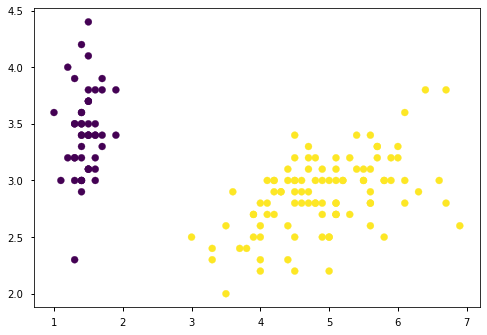

In [2]:
# Plotting different points
def plot_iris():
    fig, ax = plt.subplots()
    ax.scatter(x=iris_data[:,2], y=iris_data[:,1], c=iris_targets)
    return fig,ax
fig,ax= plot_iris()

### Q1: Look at these lines, which is a better model?



- 

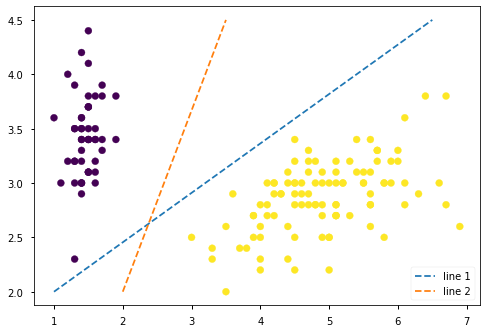

In [3]:
# Plotting lines to separate points
fig,ax=plot_iris()
l1 = np.array([[1,2],[6.5,4.5]])
ax.plot(l1[:,0], l1[:,1], linestyle='--',label='line 1')
l2 = np.array([[2,2],[3.5,4.5]])
ax.plot(l2[:,0], l2[:,1], linestyle='--',label='line 2')

ax.legend()

#### A1: 

- Line 2.

### Q2: Why is it better? 

- 

#### A2:

- Maximizes the distance between the data points and the line (the margin).


### Accuracy isn't everything

> Could say each line classifies the same (accuracy), so which of the following would be better?

(1.0, 5.0)

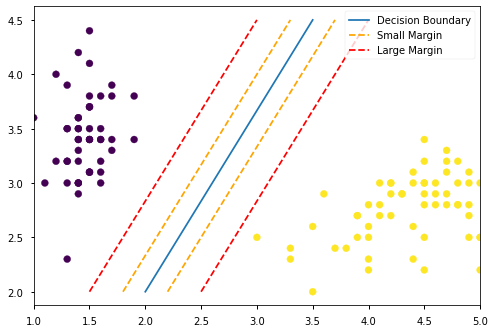

In [4]:
# Small margin
margin_small = np.array([0.2,0])
l2_margin_pos_small = l2 + margin_small
l2_margin_neg_small = l2 - margin_small

## Large margin
margin_larger = np.array([0.5,0])
l2_margin_pos_big = l2 + margin_larger
l2_margin_neg_big = l2 - margin_larger

# Plotting different points
fig,ax = plot_iris()
# Plotting lines to separate points
ax.plot(l2[:,0], l2[:,1], linestyle='-', label='Decision Boundary')

# Plot with margins
ax.plot(l2_margin_pos_small[:,0], l2_margin_pos_small[:,1], 
        linestyle='--', color='orange', label='Small Margin')
ax.plot(l2_margin_neg_small[:,0], l2_margin_neg_small[:,1], linestyle='--', color='orange')

ax.plot(l2_margin_pos_big[:,0], l2_margin_pos_big[:,1], 
        linestyle='--', color='red',label='Large Margin')
ax.plot(l2_margin_neg_big[:,0], l2_margin_neg_big[:,1], linestyle='--', color='red')
ax.legend()
ax.set_xlim(1,5)

<!---#### Line Definitions/Legend
- Blue = Model
- Possible Margins:
    - orange
    - red
    
- Left and Right margins are called negative and positive hyperplanes--->

### Q3: Which margin is better? Why?

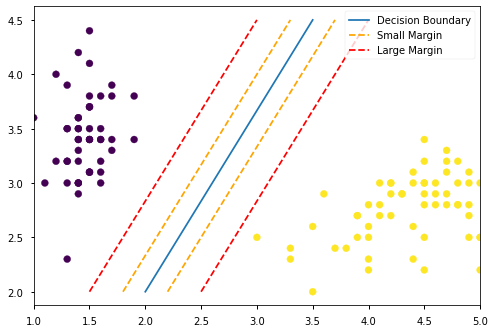

In [5]:
fig

- 

#### A3:

- The larger margin. 
- The smaller the margin the more you're assuming your model is correct and the more likely it will be over-fit and not generalize well.
<!--- > <img src="https://raw.githubusercontent.com/jirvingphd/dsc-introduction-to-support-vector-machines-online-ds-pt-100719/master/images/new_SVM_test2.png"> --->

# So what is a "support vector" anyway?

## Terminology

#### Hyperplane: 

- a $n$-dimensional line.
- These hyperplanes are defined by two terms: $w_T$ and $b$. 
    - $w_T$ term is called the **weight vector** and contains the weights that are used in the classification.
    - $b$ term is called the **bias** and functions as an offset term. 
        - If there were no bias term, the hyperplane would always go through the origin which would not be very generalizable! 

### Sidebar: Linear Equation Notation vs Linear Regression

> **in Linear Regression, we predict $y$ using 2 parameters, m (slope) + b(intercept/constant):**
$$ \large y = mx+b $$
where: 
- $x$ = input data for modeling
- $y$ = model] predictions
- $m$ = slope
- $b$ = intercept

>**In Linear Model Formulas, terminology/notation changes:**
- slopes $(m)$ becomes **weights ($w$)**
- constants $b$ becomes **biases ($b$)**
$$ \large y =  XW^T+B $$
- $x$ = input data for modeling
- $y$ = model] predictions
- $w$ is the weight (slope)
- $b$ is the bias (constant)
 <img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/linear _model_multi_inputs_and_outputs.png" width=40%>

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/linear_model_multi_inputs.png" width=40%>

<!---<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/linear_model_multi_inputs_arrows.png" width=40%>
--->

## Terminology Continued 

#### Decision boundary: 

- The hyperplane that divides/separates the classes
<img src="https://raw.githubusercontent.com/jirvingphd/dsc-introduction-to-support-vector-machines-online-ds-pt-100719/master/images/new_SVM_2.png" width=30%>

#### Margin

- The distance between the decision boundary and the closes datapoints
<img src="https://raw.githubusercontent.com/jirvingphd/dsc-introduction-to-support-vector-machines-online-ds-pt-100719/master/images/new_SVM_4.png" width=30%>
 

#### Support Vector:

- "Support vectors are the data points nearest to the hyperplane, the points of a data set that, if removed, would alter the position of the dividing hyperplane. Because of this, they can be considered the critical elements of a data set." - [KDnuggets - SVM simple explanation](https://www.kdnuggets.com/2016/07/support-vector-machines-simple-explanation.html) 

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-introduction-to-support-vector-machines-online-ds-pt-100719/master/images/new_SVM_fin.png" width=60%>

#### Positive/Negative Hyperplanes

> Note: For SVMs, we do not represent our classes as 0 and 1, instead we use -1 and +1

- Positive Hyperplane:
    - The line defined by the support vectors to the right (+) of the decision boundary
    $$ b + w_Tx_{pos} =1$$

    
- Negative Hyperplane:
    - The line defined support vector to the left (-) of the decision boundary
    $$ b + w_Tx_{neg} =-1$$


## Support Vector Machine - Max-Margin  Classifier

> Our goal is to **maximize the separation between the two hyperplanes.**

- To do this, first subtract the negative hyperplane's equation from the positive hyperplane's equation:

$$ \large w_T(x_{pos}-x_{neg}) = 2$$

- Normalize $w_T$ by dividing both sides of the equation by its norm, $||w||$
    - Note: $ || w ||= \sqrt{\sum^m_{j-1}w_j^2} $

> **The equation becomes:**
$$ \large \dfrac{w_T(x_{pos}-x_{neg})}{\lVert w \rVert} = \dfrac{2}{\lVert w \rVert}$$

- The left side of the equation = the distance between the positive and negative hyperplanes. (This is the **margin**)

- The objective of the SVM is then maximizing $\dfrac{2}{\lVert w \rVert}$ under the constraint/requirement that the samples are classified correctly. 


- Note that maximizing $\dfrac{2}{\lVert w \rVert}$ means we're minimizing $\lVert w \rVert$, or
    - as is done in practice because it seems to be easier to be minimized, $\dfrac{1}{2}\lVert w \rVert^2$.

> Contraints expressed mathematically:
- $ b + w_Tx^{(i)} \geq 1$  if $y ^{(i)} = 1$
- $ b + w_Tx^{(i)} \leq -1$  if $y ^{(i)} = -1$<br>
For $i= 1,\ldots ,N$
> These equations say that:
- all negative samples should fall on the left side of the negative hyperplane
- whereas all the positive samples should fall on the right of the positive hyperplane. 

<!---This can also be written in one line as follows:

$y ^{(i)} (b + w_Tx^{(i)} )\geq 1$  for each $i$
--->


## But what if my data isn't easily separable?
- When does maximizing the margin cause problems?

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-introduction-to-support-vector-machines-online-ds-pt-100719/master/images/new_SVM_C.png">

- So Where do we go from here?/ What can we do about this?

### Two Types of SVM Max-Margin Classifier


- Two kinds of max-margin classifiers:
    - hard margin = no errors whatsoever
    - soft margin = allows for errors


## The Soft-Margin Classifier

- The linear constraints need to be relaxed for data that are not linearly separable.
- We do this by adding slack variables $\xi$ to our margins. 
    - By adding some slack ( allowance for misclassification), we improve model generalizability while sacrificing accuracy
> Soft Margine Constraints:
>- $ b + w_Tx^{(i)} \geq 1-\xi^{(i)}$  if $y ^{(i)} = 1$
>- $ b + w_Tx^{(i)} \leq -1+\xi^{(i)}$  if $y ^{(i)} = -1$<br>For $i= 1,\ldots ,N$


- The objective function (AKA the function you want to minimize) is 

 $$\dfrac{1}{2}\lVert w \rVert^2+ C(\sum_i \xi^{(i)})$$
- The hyperparameter $C$ is used to define how much slack is allowed.


### The Hyperparameter $C$

Q: What happens if $C$ is very large? (What errors do we care about more?)


        
        
<img src="https://raw.githubusercontent.com/learn-co-students/dsc-introduction-to-support-vector-machines-online-ds-pt-100719/master/images/new_SVM_C.png">

- When C is large, we get left figure. 
    - Misclassifications are heavily punished.
- When C is small, we get right figure.
    - Misclassifications are accepted to maximize overall margin

<!---
## Classification error

We minimize the two kinds of error:
 - how many are "misclassified" 
 - how many are in bad boundary (within margin)
 

This gives us something like this:

$Error_{total} = Error_{classification} + Error_{margin}$
 

- We start from our margin to count the error (instead of the center)

## Margin error

- $E = |W|^2 = ||W_1||+||W_2|| + …$ 
    + big vs small margin (we want very large)
- $M = \frac{2}{||W||}$ 
    + inverse proportion, large margin → small error

Turns out to the same as the L2 Regularization!

## Gradient Descent to minimize--->

# The Kernel Trick

> #### Q: But what do we do when don't have linearly separable data??

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-the-kernel-trick-online-ds-pt-100719/master/images/new_SVM_nonlin.png" width=60%>

> #### A: When a simple model isn't good enough, extend to higher dimensions.

> Use a kernel function to transform the data into a higher dimension and then separate the data in the higher dimension.

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-the-kernel-trick-online-ds-pt-100719/master/images/new_SVM_kernel.png" width=60%>


## Kernel Function Resources

- **Blog Posts/Articles**
    - [Blog Post on Hyperparameter Tuning](https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769)
    - 

- **Scikit-Learn Documentation:**
    - [SVMs for Classification](https://scikit-learn.org/stable/modules/svm.html#classification)
    - [Scikit-Learn Docs: Kernel Functions](https://scikit-learn.org/stable/modules/svm.html#svm-kernels)

        - [Scikit-Learn SVM Math Equations](https://scikit-learn.org/stable/modules/svm.html#mathematical-formulation)

## Kernel Functions for sklearn's `SVC`

- Probably the most important information worth reviewing is some of the various kernel functions that you can apply.


- Recall that in general, `C` is the parameter for balancing standard accuracy metrics for tuning classifiers versus the decision boundary distance.

#### 1. Radial Basis Functions (RBF) Kernel
$$\exp{(-\gamma \lVert  x -  x' \rVert^2)} $$
- [Hyperparameters](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html):
    1. `C`
    2. $\gamma$, which can be specified using `gamma` in scikit-learn (default='auto')
        - Large gamma = overfitting
        - Small gamma = underfitting

#### 2. Polynomial Kernel
$$(\gamma \langle  x -  x' \rangle+r)^d $$
- Hyperparameters:
    1. $\gamma$, which can be specified using `gamma` in scikit-learn
    2. $r$, which can be specified using `coef0` in scikit-learn
    3. $d$, which can be specified using `degree` in scikit-learn

#### 3. Sigmoid Kernel
$$\tanh ( \gamma\langle  x -  x' \rangle+r) $$
- Hyperparameters:
    1. $\gamma$, which can be specified using `gamma` in scikit-learn
    2. $r$, which can be specified using `coef0` in scikit-learn


### Other Types of SVC Models in sklearn

#### NuSVC
- Like SVC, NuSVC but adds a parameter $v$ (see hyperparameters below). 
- NuSVC implements "one-against-one" approach when number of classes >2
    - when there are n classes, $\dfrac{n*(n-1)}{2}$ classifiers are created, and each one classifies samples in 2 classes. 


- Hyperparameters:
    - $v$: controls the number of support vectors and training errors
        - creates upper bound on training errors
        - creates lower bound on support vectors


##### LinearSVC
- Like SVC but LinearSVC implements "one-vs-rest" so when there are $n$ classes, just $n$ classifiers are created and each one classifies samples in 2 classes (class of interest and all others)
- LinearSVC generates more classifiers, so LinearSVC tends to scale better.

### But there's sooo many options?!?

- To keep it simple:
    - If your data looks linearly separable, use linear SVC, otherwise use RBF
    - But I am sure you can find some technical papers discussing the tradeoffs of all of the options.
     - (I wasn't able to find a good high-level comparison or use-case type of article.)

___

# Activity: Iowa Prisoners (with Pipelines!)

In [2]:
#!pip install -U fsds
from fsds.imports import *

In [3]:
# # prisoners = "https://raw.githubusercontent.com/jirvingphd/dsc-3-final-project-online-ds-ft-021119/master/iowa_recidivism_renamed.csv"
df = fs.datasets.load_iowa_prisoners(vers='clean',read_csv_kwds={'index_col':0})
## Drop unwanted cols
df= df.drop(columns=['yr_released','report_year'])
df.head()

,race_ethnicity,age_released,crime_class,crime_type,crime_subtype,release_type,super_dist,recidivist,target_pop,sex
0,Black - Non-Hispanic,25-34,C Felony,Violent,Robbery,Parole,7JD,Yes,Yes,Male
1,White - Non-Hispanic,25-34,D Felony,Property,Theft,Discharged – End of Sentence,NaN,Yes,No,Male
2,White - Non-Hispanic,35-44,B Felony,Drug,Trafficking,Parole,5JD,Yes,Yes,Male
3,White - Non-Hispanic,25-34,B Felony,Other,Other Criminal,Parole,6JD,No,Yes,Male
4,Black - Non-Hispanic,35-44,D Felony,Violent,Assault,Discharged – End of Sentence,NaN,Yes,No,Male


In [4]:
df.dtypes

race_ethnicity    object
age_released      object
crime_class       object
crime_type        object
crime_subtype     object
release_type      object
super_dist        object
recidivist        object
target_pop        object
sex               object
dtype: object

In [5]:
df.nunique().sum()

90

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26020 entries, 0 to 26019
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   race_ethnicity  25990 non-null  object
 1   age_released    26017 non-null  object
 2   crime_class     26020 non-null  object
 3   crime_type      26020 non-null  object
 4   crime_subtype   26020 non-null  object
 5   release_type    24258 non-null  object
 6   super_dist      16439 non-null  object
 7   recidivist      26020 non-null  object
 8   target_pop      26020 non-null  object
 9   sex             26017 non-null  object
dtypes: object(10)
memory usage: 2.2+ MB


### Making age_released numerical

In [7]:
df['age_released'].value_counts(dropna=False)

25-34           9554
35-44           6223
Under 25        4590
45-54           4347
55 and Older    1303
NaN                3
Name: age_released, dtype: int64

In [8]:
# Mapping age_map onto 'age_released'
# Encoding age groups as ordinal
age_ranges = ('Under 25','25-34', '35-44','45-54','55 and Older')
age_numbers = (20,30,40,50,70) 
age_num_map = dict(zip(age_ranges,age_numbers))
age_num_map

{'Under 25': 20, '25-34': 30, '35-44': 40, '45-54': 50, '55 and Older': 70}

In [9]:
df['age_released'] = df['age_released'].map(age_num_map)
df['age_released'].value_counts(dropna=False)

30.0    9554
40.0    6223
20.0    4590
50.0    4347
70.0    1303
NaN        3
Name: age_released, dtype: int64

### Simplifying Categorical Columns

In [10]:
# df['race_ethnicity'].value_counts(dropna=False)

In [11]:
# # Defining Dictionary Map for race_ethnicity categories
# race_ethnicity_map = {
#     'White - Non-Hispanic':'White',
#     'Black - Non-Hispanic': 'Black',
#     'White - Hispanic' : 'Hispanic',
#     'American Indian or Alaska Native - Non-Hispanic' : 'American Native',
#     'Asian or Pacific Islander - Non-Hispanic' : 'Asian or Pacific Islander',
#     'Black - Hispanic' : 'Black',
#     'American Indian or Alaska Native - Hispanic':'American Native',
#     'White -' : 'White',
#     'Asian or Pacific Islander - Hispanic' : 'Asian or Pacific Islander',
#     'N/A -' : np.nan,
#     'Black -':'Black'
# }

# df['race_ethnicity'] = df['race_ethnicity'].map(race_ethnicity_map)
# df['race_ethnicity'].value_counts(dropna=False)

In [12]:
# df['crime_class'].value_counts()

In [13]:
# # Remapping
# crime_class_map = {'Other Felony (Old Code)': np.nan ,#or other felony
#                   'Other Misdemeanor':np.nan,
#                    'Felony - Mandatory Minimum':np.nan, # if minimum then lowest sentence ==  D Felony
#                    'Special Sentence 2005': 'Sex Offender',
#                    'Other Felony' : np.nan ,
#                    'Sexual Predator Community Supervision' : 'Sex Offender',
#                    'D Felony': 'D Felony',
#                    'C Felony' :'C Felony',
#                    'B Felony' : 'B Felony',
#                    'A Felony' : 'A Felony',
#                    'Aggravated Misdemeanor':'Aggravated Misdemeanor',
#                    'Felony - Enhancement to Original Penalty':'Felony - Enhanced',
#                    'Felony - Enhanced':'Felony - Enhanced' ,
#                    'Serious Misdemeanor':'Serious Misdemeanor',
#                    'Simple Misdemeanor':'Simple Misdemeanor'}

# df['crime_class'] = df['crime_class'].map(crime_class_map)
# df['crime_class'].value_counts(dropna=False)

In [14]:
df.dtypes

race_ethnicity     object
age_released      float64
crime_class        object
crime_type         object
crime_subtype      object
release_type       object
super_dist         object
recidivist         object
target_pop         object
sex                object
dtype: object

> For interest of model gridsarching, let's drop some categorical features

In [15]:
df.nunique()

race_ethnicity    11
age_released       5
crime_class       15
crime_type         5
crime_subtype     26
release_type      12
super_dist        10
recidivist         2
target_pop         2
sex                2
dtype: int64

In [16]:
df.drop(columns=['crime_subtype'],inplace=True)
df.nunique()

race_ethnicity    11
age_released       5
crime_class       15
crime_type         5
release_type      12
super_dist        10
recidivist         2
target_pop         2
sex                2
dtype: int64

## Preprocessing with Pipelines +  `ColumnTransformer`

- [Pipeline Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)
- [ColumnTransformer Documentation](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html)

### Train-Test-Split

In [17]:
## Make x and y
X = df.drop(columns=['recidivist'])
y = df['recidivist'].map({'Yes':1,'No':0})
y

0        1
1        1
2        1
3        0
4        1
        ..
26015    0
26016    0
26017    0
26018    0
26019    1
Name: recidivist, Length: 26020, dtype: int64

In [18]:
## check class balance
y.value_counts(normalize=True)

0    0.666372
1    0.333628
Name: recidivist, dtype: float64

In [46]:
from sklearn.model_selection import train_test_split

## Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y)#,stratify=y)
y_train.value_counts(1), y_test.value_counts(1)

(0    0.667948
 1    0.332052
 Name: recidivist, dtype: float64,
 0    0.661645
 1    0.338355
 Name: recidivist, dtype: float64)

# Preprocessing Data

- Impute Null values
- Scaling Numerical Data
- Encode Categorical Data
    - ~~Label Encoding~~
    - One hot encoding


In [48]:
df.isna().sum()

race_ethnicity      30
age_released         3
crime_class          0
crime_type           0
release_type      1762
super_dist        9581
recidivist           0
target_pop           0
sex                  3
dtype: int64

<AxesSubplot:>

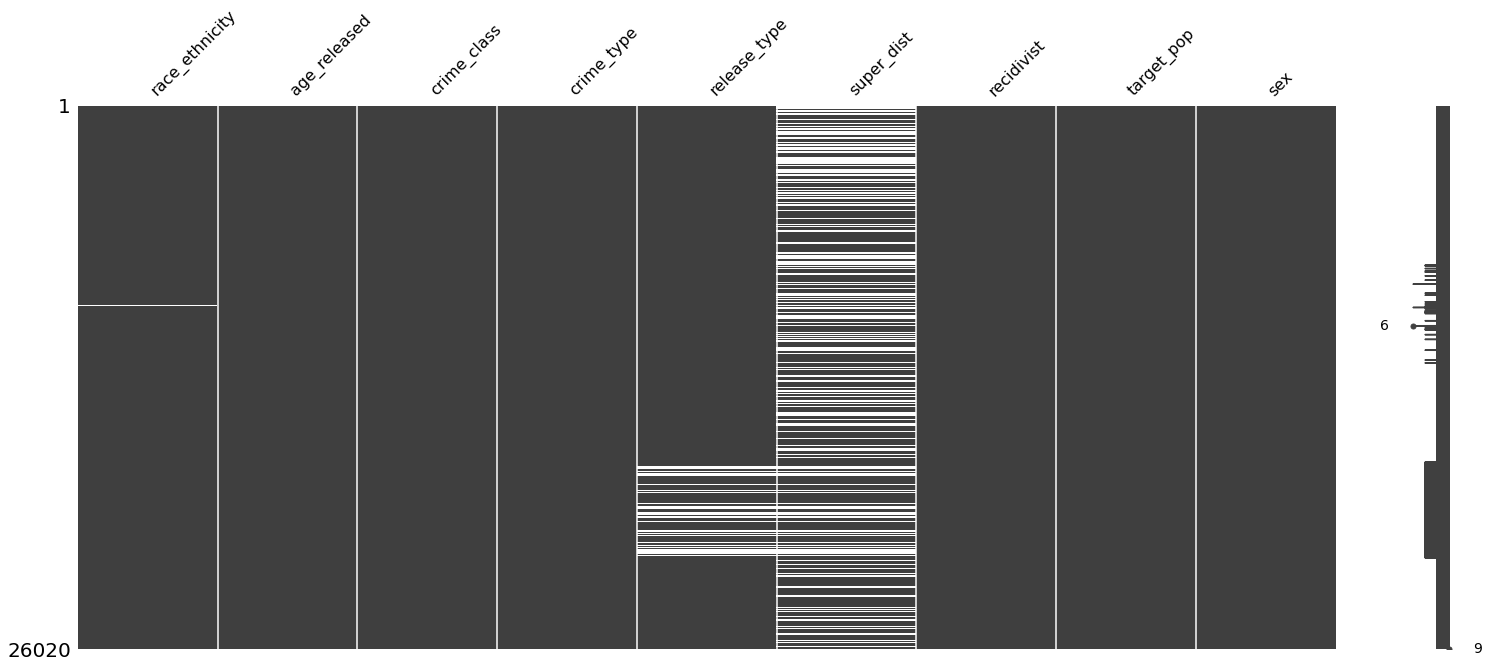

In [20]:
## Check null values (visually too)
import missingno
missingno.matrix(df)

In [47]:
X_train.columns

Index(['race_ethnicity', 'age_released', 'crime_class', 'crime_type',
       'release_type', 'super_dist', 'target_pop', 'sex'],
      dtype='object')


- 'race_ethnicity'
- 'age_released',
- 'crime_class',
- 'crime_type',
- 'release_type',
- 'super_dist', 
- 'target_pop'
- , 'sex'

#### Pipelnes and ColumnTransformer

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [22]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler,OneHotEncoder

In [23]:
from sklearn import set_config
set_config(display='text')

In [59]:
## Get a list of columns to be run as numeric data
num_cols = X_train.select_dtypes('number').columns
num_cols

Index(['age_released'], dtype='object')

In [60]:
steps = []
nan_vals = ['?',np.nan]

for i,val in enumerate(nan_vals):
    
    steps.append( (f"imputer_{i}", SimpleImputer(missing_values=val)))
steps

[('imputer_0', SimpleImputer(missing_values='?')),
 ('imputer_1', SimpleImputer())]

In [61]:
num_transformer = Pipeline(steps=[*steps,('scaler',StandardScaler())])
num_transformer

Pipeline(steps=[('imputer_0', SimpleImputer(missing_values='?')),
                ('imputer_1', SimpleImputer()), ('scaler', StandardScaler())])

In [62]:
## Make a num_transformer pipeline
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())])
num_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [65]:
## vis as diagram
set_config(display='text')
num_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [66]:
## Get a list of columns to be run as categorical data
cat_cols = X_train.select_dtypes('O').columns
cat_cols

Index(['race_ethnicity', 'crime_class', 'crime_type', 'release_type',
       'super_dist', 'target_pop', 'sex'],
      dtype='object')

In [73]:
## Create a cat_transformer pipeline 
cat_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore',sparse=False))])
cat_transformer

## that will impute using median and then calculate z-scores


Pipeline(steps=[('imputer',
                 SimpleImputer(fill_value='missing', strategy='constant')),
                ('encoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

### Combine Preprocessing into one ColumnTransformer

In [74]:
## COMBINE BOTH PIPELINES INTO ONE WITH COLUMN TRANSFORMER
from sklearn.compose import ColumnTransformer
preprocessing = ColumnTransformer(transformers=[
    ('num',num_transformer,num_cols),
    ('cat',cat_transformer,cat_cols)])
preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['age_released'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 Index(['race_ethnicity', 'crime_class', 'crime_type', 'release_type',
       'super_dist', 'target_pop', 'sex'],
      

In [76]:
## Get X_train and X_test from column transformer
X_train_tf = preprocessing.fit_transform(X_train)
X_test_tf = preprocessing.transform(X_test)
X_train_tf

array([[ 0.32391982,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.48422327,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.48422327,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.48422327,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.48422327,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.48422327,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ]])

> **One downside of Pipelines is that its harder to get the individual info we need to re-form our dataset as a df**

In [77]:
set_config(display='text')
slice_pipe = preprocessing.named_transformers_['cat']
slice_pipe

Pipeline(steps=[('imputer',
                 SimpleImputer(fill_value='missing', strategy='constant')),
                ('encoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [81]:
cat_feautres = slice_pipe.named_steps['encoder'].get_feature_names(cat_cols)
cat_feautres

array(['race_ethnicity_American Indian or Alaska Native - Hispanic',
       'race_ethnicity_American Indian or Alaska Native - Non-Hispanic',
       'race_ethnicity_Asian or Pacific Islander - Hispanic',
       'race_ethnicity_Asian or Pacific Islander - Non-Hispanic',
       'race_ethnicity_Black -', 'race_ethnicity_Black - Hispanic',
       'race_ethnicity_Black - Non-Hispanic', 'race_ethnicity_N/A -',
       'race_ethnicity_White -', 'race_ethnicity_White - Hispanic',
       'race_ethnicity_White - Non-Hispanic', 'race_ethnicity_missing',
       'crime_class_A Felony', 'crime_class_Aggravated Misdemeanor',
       'crime_class_B Felony', 'crime_class_C Felony',
       'crime_class_D Felony', 'crime_class_Felony - Enhanced',
       'crime_class_Felony - Enhancement to Original Penalty',
       'crime_class_Felony - Mandatory Minimum',
       'crime_class_Other Felony', 'crime_class_Other Felony (Old Code)',
       'crime_class_Other Misdemeanor', 'crime_class_Serious Misdemeanor',
   

In [82]:
X_train_tf = pd.DataFrame(X_train_tf,columns=[*num_cols, *cat_feautres])
X_train_tf

,age_released,race_ethnicity_American Indian or Alaska Native - Hispanic,race_ethnicity_American Indian or Alaska Native - Non-Hispanic,race_ethnicity_Asian or Pacific Islander - Hispanic,race_ethnicity_Asian or Pacific Islander - Non-Hispanic,race_ethnicity_Black -,race_ethnicity_Black - Hispanic,race_ethnicity_Black - Non-Hispanic,race_ethnicity_N/A -,race_ethnicity_White -,...,super_dist_7JD,super_dist_8JD,super_dist_ISC,super_dist_Interstate Compact,super_dist_missing,target_pop_No,target_pop_Yes,sex_Female,sex_Male,sex_missing
0,0.323920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,-0.484223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-0.484223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,-0.484223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,0.323920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19510,-1.292366,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
19511,-0.484223,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
19512,-0.484223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
19513,-0.484223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [83]:
number_cols = num_cols.tolist().copy()
number_cols

['age_released']

In [84]:
number_cols.extend(cat_feautres)

In [85]:
number_cols

['age_released',
 'race_ethnicity_American Indian or Alaska Native - Hispanic',
 'race_ethnicity_American Indian or Alaska Native - Non-Hispanic',
 'race_ethnicity_Asian or Pacific Islander - Hispanic',
 'race_ethnicity_Asian or Pacific Islander - Non-Hispanic',
 'race_ethnicity_Black -',
 'race_ethnicity_Black - Hispanic',
 'race_ethnicity_Black - Non-Hispanic',
 'race_ethnicity_N/A -',
 'race_ethnicity_White -',
 'race_ethnicity_White - Hispanic',
 'race_ethnicity_White - Non-Hispanic',
 'race_ethnicity_missing',
 'crime_class_A Felony',
 'crime_class_Aggravated Misdemeanor',
 'crime_class_B Felony',
 'crime_class_C Felony',
 'crime_class_D Felony',
 'crime_class_Felony - Enhanced',
 'crime_class_Felony - Enhancement to Original Penalty',
 'crime_class_Felony - Mandatory Minimum',
 'crime_class_Other Felony',
 'crime_class_Other Felony (Old Code)',
 'crime_class_Other Misdemeanor',
 'crime_class_Serious Misdemeanor',
 'crime_class_Sexual Predator Community Supervision',
 'crime_class

In [86]:
# [*num_cols,*cat_feautres]

In [87]:
X_test_tf = pd.DataFrame(X_test_tf,columns=[*num_cols, *cat_feautres])
X_test_tf


,age_released,race_ethnicity_American Indian or Alaska Native - Hispanic,race_ethnicity_American Indian or Alaska Native - Non-Hispanic,race_ethnicity_Asian or Pacific Islander - Hispanic,race_ethnicity_Asian or Pacific Islander - Non-Hispanic,race_ethnicity_Black -,race_ethnicity_Black - Hispanic,race_ethnicity_Black - Non-Hispanic,race_ethnicity_N/A -,race_ethnicity_White -,...,super_dist_7JD,super_dist_8JD,super_dist_ISC,super_dist_Interstate Compact,super_dist_missing,target_pop_No,target_pop_Yes,sex_Female,sex_Male,sex_missing
0,0.323920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.132063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,-1.292366,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,0.323920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,0.323920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6500,0.323920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6501,-0.484223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6502,-1.292366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6503,1.132063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [88]:
## Make X_train_ohe and X_teast_ohe dataqframes


### SVM with sklearn

In [89]:
X_train_tf.shape

(19515, 62)

In [92]:
set_config(display='text')
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [96]:
## Get PReds
y_hat_test = clf.predict(X_test_tf)
y_hat_test

array([1, 0, 0, ..., 1, 0, 0])

In [108]:
import sklearn.metrics as metrics

def evaluate_classification(model,X_test,y_test,classes=None,
                           normalize='true',cmap='Purples',label=''):
    """Accepts an sklearn-compatible classification model + test data 
    and displays several sklearn.metrics functions: 
    - classifciation_report
    - plot_confusion_matrix
    - plot_roc_curve
    """
     
    ## Get Predictions
    y_hat_test = model.predict(X_test)
    
    
    ## Classification Report / Scores 
    table_header = "[i] CLASSIFICATION REPORT"
    
    ## Add Label if given
    if len(label)>0:
        table_header += f" {label}"
        
    
    ## PRINT CLASSIFICATION REPORT
    dashes = '---'*20
    print(dashes,table_header,dashes,sep='\n')

    print(metrics.classification_report(y_test,y_hat_test,
                                    target_names=classes))
    
    report = metrics.classification_report(y_test,y_hat_test,
                                               target_names=classes,
                                          output_dict=True)
    print(dashes+"\n\n")
    
    

    ## MAKE FIGURE
    fig, axes = plt.subplots(figsize=(10,4),ncols=2)
    
    ## Plot Confusion Matrix 
    metrics.plot_confusion_matrix(model, X_test,y_test,
                                  display_labels=classes,
                                  normalize=normalize,
                                 cmap=cmap,ax=axes[0])
    axes[0].set(title='Confusion Matrix')
    
    ## Plot Roc Curve
    roc_plot = metrics.plot_roc_curve(model, X_test, y_test,ax=axes[1])
    axes[1].legend()
    axes[1].plot([0,1],[0,1],ls=':')
    axes[1].grid()
    axes[1].set_title('Receiving Operator Characteristic (ROC) Curve') 
    fig.tight_layout()
    plt.show()
    
    return report #fig,axes

------------------------------------------------------------
[i] CLASSIFICATION REPORT Baseline - Imblananced
------------------------------------------------------------
              precision    recall  f1-score   support

          No       0.70      0.83      0.76      4304
         Yes       0.48      0.32      0.38      2201

    accuracy                           0.65      6505
   macro avg       0.59      0.57      0.57      6505
weighted avg       0.63      0.65      0.63      6505

------------------------------------------------------------




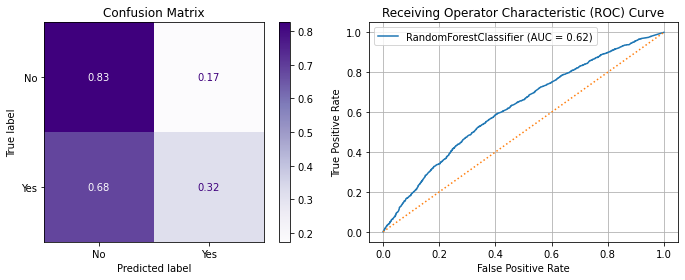

In [117]:
## fit model
clf = RandomForestClassifier()
clf.fit(X_train_tf,y_train)

evaluate_classification(clf,X_test_tf,y_test,classes=['No','Yes'],
                       label='Baseline - Imblananced');

------------------------------------------------------------
[i] CLASSIFICATION REPORT class_weight='balanced'
------------------------------------------------------------
              precision    recall  f1-score   support

          No       0.73      0.67      0.70      4304
         Yes       0.44      0.51      0.47      2201

    accuracy                           0.62      6505
   macro avg       0.58      0.59      0.59      6505
weighted avg       0.63      0.62      0.62      6505

------------------------------------------------------------




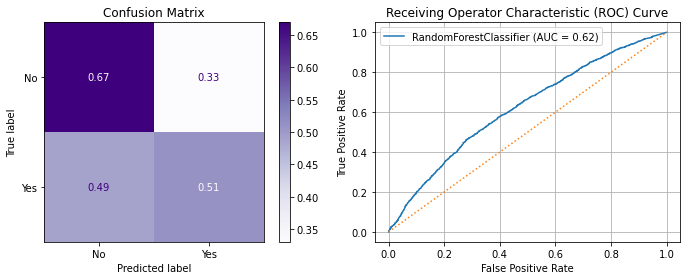

In [119]:
## Class_weight
## fit model
clf = RandomForestClassifier(class_weight='balanced_subsample')
clf.fit(X_train_tf,y_train)
evaluate_classification(clf,X_test_tf,y_test,classes=['No','Yes'],
                       label="class_weight='balanced'");

## SMOTE

In [131]:
mask = []
for col in X_train_tf.columns:
    if col in cat_feautres:
        mask.append(True)
    else:
        mask.append(False)
# cat_mask = [True for col in X_train_tf.columns else False]
mask[:5]

[False, True, True, True, True]

In [126]:
from imblearn.over_sampling import SMOTENC

smote = SMOTENC(categorical_features=mask)
X_train_res, y_train_res = smote.fit_resample(X_train_tf,y_train)

In [129]:
y_train_res.value_counts(1)

1    0.5
0    0.5
Name: recidivist, dtype: float64

------------------------------------------------------------
[i] CLASSIFICATION REPORT class_weight='balanced'
------------------------------------------------------------
              precision    recall  f1-score   support

          No       0.73      0.65      0.69      4304
         Yes       0.43      0.52      0.47      2201

    accuracy                           0.61      6505
   macro avg       0.58      0.59      0.58      6505
weighted avg       0.63      0.61      0.62      6505

------------------------------------------------------------




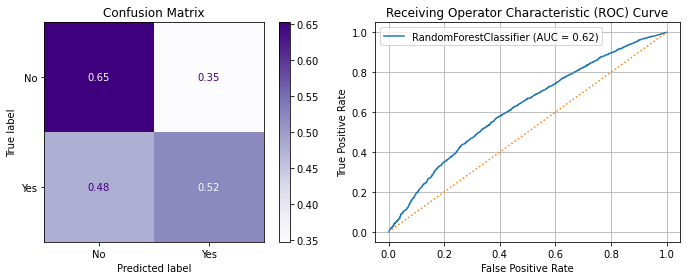

In [130]:
## Class_weight
## fit model
clf = RandomForestClassifier()
clf.fit(X_train_res,y_train_res)
evaluate_classification(clf,X_test_tf,y_test,classes=['No','Yes'],
                       label="class_weight='balanced'");

# SVMs Part 2
- 09/30 Study Group

## QUESTIONS TO RETURN TO

- Classification Report
- Plotting confusion matrix
- GridSearch, params, for SVM

## GridSearching for SVM with RBF Kernel best C and gamma

In [ ]:
from sklearn.model_selection import GridSearchCV
clf = SVC()
params = dict( C=[0.1,1,10],
             gamma = [0.1,1,100],
             class_weight =[None,'balanced'])

gridsearch= GridSearchCV(clf,params,cv=3, n_jobs=-1 )
gridsearch

In [ ]:
gridsearch.fit(X_train_tf,y_train)

In [ ]:
best_params = gridsearch.best_params_
best_params

In [ ]:
best_model = SVC(**best_params)

In [ ]:
best_model = gridsearch.best_estimator_
best_model

# APPENDIX

## Note re: predictions/probability

> You can make predictions using support vector machines. The SVC decision function gives a probability score per class. However, this is not done by default. You'll need to set the `probability` argument equal to `True`. Scikit-learn internally performs cross-validation to compute the probabilities, so you can expect that setting `probability` to `True` makes the calculations longer. For large datasets, computation can take considerable time to execute.

- In other words:
    - If you want to get the probabiltiies (`.predict_proba`) for ROC AUC, you would have to instantiate your SVC with the parameter `SVC(probability=True)`
    - https://www.kaggle.com/c/home-credit-default-risk/discussion/63499

## Scikit Learn Example of RBF Hyperparameters

> https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

In [ ]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV


# Utility function to move the midpoint of a colormap to be around
# the values of interest.

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

# #############################################################################
# Load and prepare data set
#
# dataset for grid search

iris = load_iris()
X = iris.data
y = iris.target

# Dataset for decision function visualization: we only keep the first two
# features in X and sub-sample the dataset to keep only 2 classes and
# make it a binary classification problem.

X_2d = X[:, :2]
X_2d = X_2d[y > 0]
y_2d = y[y > 0]
y_2d -= 1

# It is usually a good idea to scale the data for SVM training.
# We are cheating a bit in this example in scaling all of the data,
# instead of fitting the transformation on the training set and
# just applying it on the test set.

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_2d = scaler.fit_transform(X_2d)

# #############################################################################
# Train classifiers
#
# For an initial search, a logarithmic grid with basis
# 10 is often helpful. Using a basis of 2, a finer
# tuning can be achieved but at a much higher cost.

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X, y)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

# Now we need to fit a classifier for all parameters in the 2d version
# (we use a smaller set of parameters here because it takes a while to train)

C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X_2d, y_2d)
        classifiers.append((C, gamma, clf))

# #############################################################################
# Visualization
#
# draw visualization of parameter effects

plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
for (k, (C, gamma, clf)) in enumerate(classifiers):
    # evaluate decision function in a grid
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # visualize decision function for these parameters
    plt.subplot(len(C_2d_range), len(gamma_2d_range), k + 1)
#     plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)),
#               size='medium')
    plt.title(f"gamma={gamma}, C={C}")

    # visualize parameter's effect on decision function
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, cmap=plt.cm.RdBu_r,
                edgecolors='k')
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')

scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),
                                                     len(gamma_range))

# Draw heatmap of the validation accuracy as a function of gamma and C
#
# The score are encoded as colors with the hot colormap which varies from dark
# red to bright yellow. As the most interesting scores are all located in the
# 0.92 to 0.97 range we use a custom normalizer to set the mid-point to 0.92 so
# as to make it easier to visualize the small variations of score values in the
# interesting range while not brutally collapsing all the low score values to
# the same color.

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()